--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


--- Descriptive Statistics ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.69

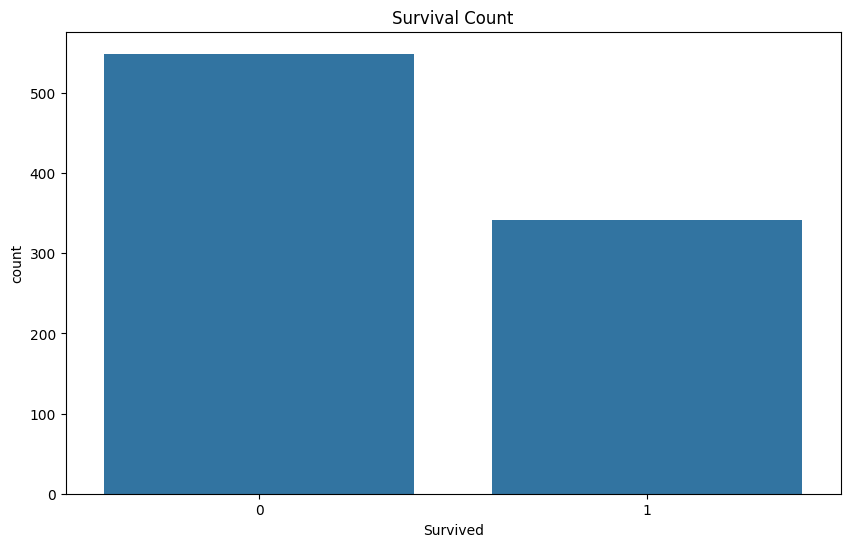

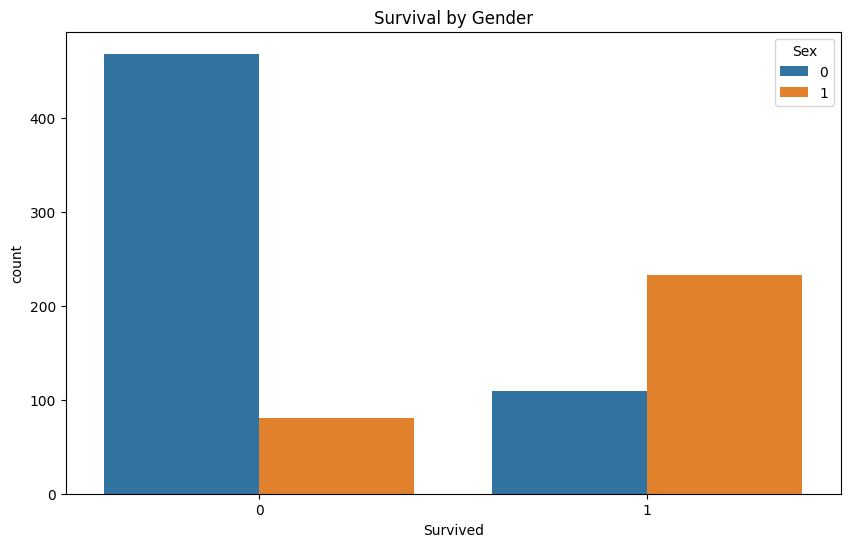

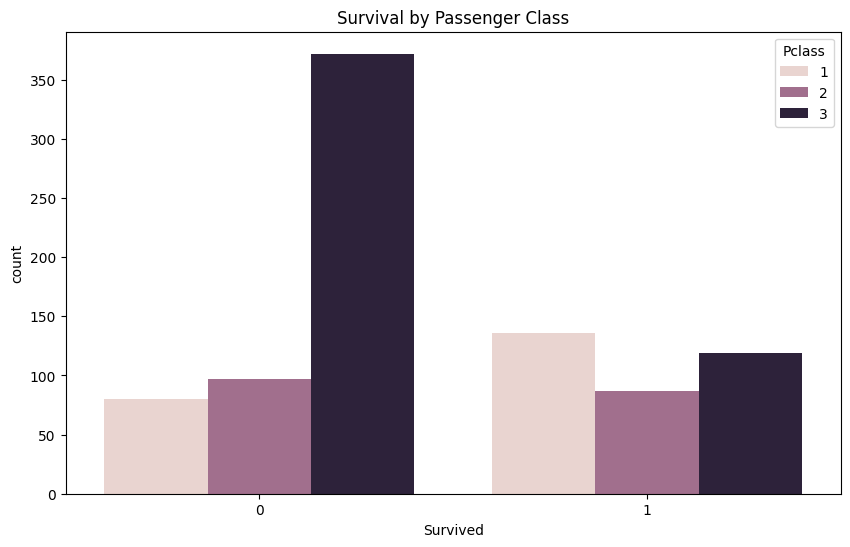

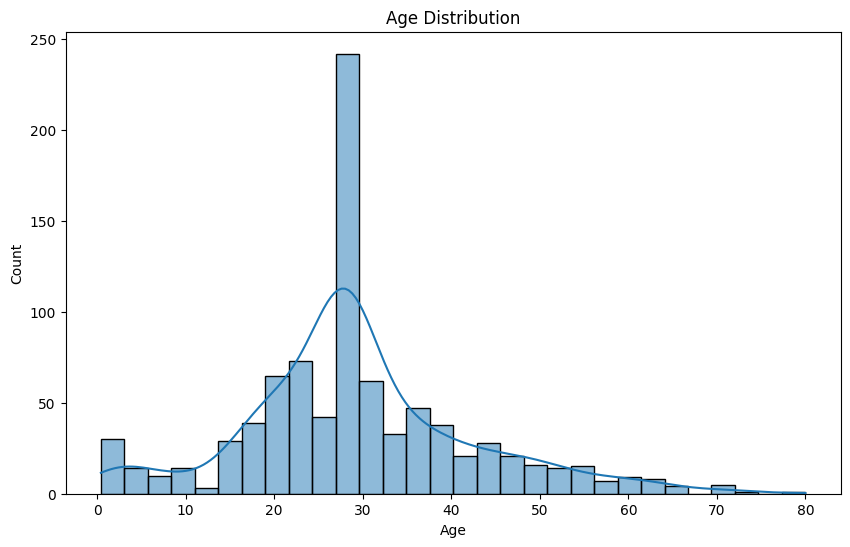

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Load your CSV file
try:
    df = pd.read_csv("Dataset.csv")
    print("File loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Make sure it's in the same folder as the notebook.")

# --- Exploratory Data Analysis ---

# Structure of the dataset
print("--- Dataset Info ---")
df.info()
print("\n")

# Summary statistics
print("--- Descriptive Statistics ---")
print(df.describe())
print("\n")

# --- Data Preprocessing ---

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column (many missing values)
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# Convert 'Sex' and 'Embarked' to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop columns that are not useful for prediction
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


# --- Random Forest Classifier ---

print("--- Random Forest Classifier Results ---")

# Define features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Make predictions and evaluate the model
y_pred_rf = rf_model.predict(X_test_rf)

print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rf, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_rf, y_pred_rf))
print("\n")


# --- Logistic Regression ---

print("--- Logistic Regression Results ---")
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df_encoded = pd.get_dummies(df[features], drop_first=True)
X_lr = df_encoded
y_lr = df['Survived']

# Train-test split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Train model
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_lr, y_train_lr)

# Evaluate
y_pred_lr = lr_model.predict(X_test_lr)
print("Accuracy:", accuracy_score(y_test_lr, y_pred_lr))
print(classification_report(y_test_lr, y_pred_lr))


# --- Data Visualization ---

# Countplot of Survival
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# Survival rate by Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

# Survival rate by Passenger Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Age Distribution")
plt.show()
